In [1]:
import pandas as pd
import sys
import numpy

sys.path.append('../')
from utils import clustering_utils, dataframe_utils

In [2]:
ttherm_df = pd.read_csv('./tt.csv')

ttherm_df

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue
0,TTHERM_00056190,5.202404,6.263250,29.547004,1.347789e-11,1.605270e-07,16.657544,6.794452
1,TTHERM_01127520,6.662236,7.776324,28.833013,1.745475e-11,1.605270e-07,16.451832,6.794452
2,TTHERM_00261850,5.436611,9.935159,27.203159,3.226752e-11,1.605270e-07,15.952414,6.794452
3,TTHERM_00558440,5.832054,6.506191,26.824168,3.741517e-11,1.605270e-07,15.829956,6.794452
4,TTHERM_00196410,5.824881,7.576266,26.519275,4.220915e-11,1.605270e-07,15.729612,6.794452
...,...,...,...,...,...,...,...,...
23655,TTHERM_00864940,-0.000081,4.529874,-0.000472,9.996323e-01,9.998013e-01,-7.285627,0.000086
23656,TTHERM_01141650,0.000273,5.035781,0.000379,9.997049e-01,9.998317e-01,-7.285627,0.000073
23657,TTHERM_00408920,-0.000055,4.678585,-0.000305,9.997624e-01,9.998470e-01,-7.285627,0.000066
23658,TTHERM_00346650,-0.000020,4.600113,-0.000107,9.999170e-01,9.999592e-01,-7.285627,0.000018


In [3]:
import numpy as np

def probability_from_bstat(b_stat):
    odds = np.exp(b_stat)
    
    probability = odds / (1 + odds)
    
    return probability

In [4]:
probability_from_bstat(1)

0.7310585786300049

In [5]:
ttherm_df['diff_exp_prob'] = ttherm_df['B'].apply(probability_from_bstat)

In [6]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
4310,TTHERM_01018540,1.325227,15.058173,5.478401,0.000213,0.001168,0.454637,2.932527,0.611741
6335,TTHERM_00473020,0.932255,15.123217,4.164410,0.001676,0.006259,-1.693914,2.203528,0.155262
8328,TTHERM_00321730,0.926043,6.007270,3.247094,0.008054,0.022879,-3.300649,1.640563,0.035549
13358,TTHERM_00527180,0.258857,15.768906,1.728604,0.112604,0.199431,-5.852427,0.700207,0.002865
16803,TTHERM_00624720,0.149168,15.825754,1.040704,0.320974,0.451930,-6.724281,0.344929,0.001200
17006,TTHERM_00624730,0.150856,15.838499,1.006386,0.336462,0.468083,-6.759087,0.329677,0.001159
18602,TTHERM_00522600,0.117594,15.778243,0.740150,0.475147,0.604310,-6.994897,0.218740,0.000916
21564,TTHERM_01055600,0.043330,15.939412,0.301397,0.768892,0.843556,-7.236397,0.073886,0.000719
22239,TTHERM_00378890,-0.029074,15.911067,-0.202463,0.843355,0.897203,-7.263360,0.047109,0.000700


In [7]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',]))
].to_csv('~/grls.csv')

In [8]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
[
'TTHERM_00378890',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00624720',
'TTHERM_00537380',
'TTHERM_01055600',
'TTHERM_00221120',
'TTHERM_00471040',
'TTHERM_00624730',
'TTHERM_01002870',
'TTHERM_00473020',
'TTHERM_01002860',
]
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
6159,TTHERM_00471040,0.756088,15.360128,4.265878,0.001417,0.005443,-1.520337,2.264172,0.179412
6335,TTHERM_00473020,0.932255,15.123217,4.164410,0.001676,0.006259,-1.693914,2.203528,0.155262
7179,TTHERM_00537380,0.859886,14.997975,3.731950,0.003475,0.011453,-2.444739,1.941099,0.079824
7518,TTHERM_01002870,0.598621,15.619248,3.573391,0.004564,0.014363,-2.723574,1.842763,0.061597
13094,TTHERM_00221120,0.319202,15.680362,1.797512,0.100517,0.181614,-5.750115,0.740851,0.003172
13358,TTHERM_00527180,0.258857,15.768906,1.728604,0.112604,0.199431,-5.852427,0.700207,0.002865
16803,TTHERM_00624720,0.149168,15.825754,1.040704,0.320974,0.451930,-6.724281,0.344929,0.001200
17006,TTHERM_00624730,0.150856,15.838499,1.006386,0.336462,0.468083,-6.759087,0.329677,0.001159
18602,TTHERM_00522600,0.117594,15.778243,0.740150,0.475147,0.604310,-6.994897,0.218740,0.000916
20743,TTHERM_01002860,0.063459,15.854511,0.421406,0.681806,0.777647,-7.189775,0.109217,0.000754


In [9]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120']
    ))
]

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
4402,TTHERM_00038880,1.176626,15.284534,5.400218,0.000239,0.001284,0.333303,2.891331,0.582563
6159,TTHERM_00471040,0.756088,15.360128,4.265878,0.001417,0.005443,-1.520337,2.264172,0.179412
6335,TTHERM_00473020,0.932255,15.123217,4.164410,0.001676,0.006259,-1.693914,2.203528,0.155262
7179,TTHERM_00537380,0.859886,14.997975,3.731950,0.003475,0.011453,-2.444739,1.941099,0.079824
7518,TTHERM_01002870,0.598621,15.619248,3.573391,0.004564,0.014363,-2.723574,1.842763,0.061597
13094,TTHERM_00221120,0.319202,15.680362,1.797512,0.100517,0.181614,-5.750115,0.740851,0.003172
13358,TTHERM_00527180,0.258857,15.768906,1.728604,0.112604,0.199431,-5.852427,0.700207,0.002865
16803,TTHERM_00624720,0.149168,15.825754,1.040704,0.320974,0.451930,-6.724281,0.344929,0.001200
17006,TTHERM_00624730,0.150856,15.838499,1.006386,0.336462,0.468083,-6.759087,0.329677,0.001159
18602,TTHERM_00522600,0.117594,15.778243,0.740150,0.475147,0.604310,-6.994897,0.218740,0.000916


In [10]:
ttherm_df.loc[
    (ttherm_df['Unnamed: 0'].isin(
['TTHERM_00046372', 'TTHERM_00537380', 'TTHERM_00473020', 'TTHERM_00038880', 'TTHERM_00527180', 'TTHERM_01002860', 'TTHERM_01055600', 'TTHERM_00378890', 'TTHERM_00624730', 'TTHERM_00624720', 'TTHERM_01002870', 'TTHERM_00471040', 'TTHERM_00522600', 'TTHERM_00221120'
]
    ))
].shape

(13, 9)

In [11]:
FC = 1.5
logFC = numpy.log2(FC)
adj_P_Val = 0.0005
B = 1

ttherm_df_filtered = ttherm_df.loc[
    (ttherm_df['logFC'] > logFC)
    &
    (ttherm_df['adj.P.Val'] < adj_P_Val)
    &
    (ttherm_df['B'] > B)
].sort_values(by=('B'), ascending=False)

ttherm_df_filtered

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,negLogPValue,diff_exp_prob
0,TTHERM_00056190,5.202404,6.263250,29.547004,1.347789e-11,1.605270e-07,16.657544,6.794452,1.000000
1,TTHERM_01127520,6.662236,7.776324,28.833013,1.745475e-11,1.605270e-07,16.451832,6.794452,1.000000
2,TTHERM_00261850,5.436611,9.935159,27.203159,3.226752e-11,1.605270e-07,15.952414,6.794452,1.000000
3,TTHERM_00558440,5.832054,6.506191,26.824168,3.741517e-11,1.605270e-07,15.829956,6.794452,1.000000
4,TTHERM_00196410,5.824881,7.576266,26.519275,4.220915e-11,1.605270e-07,15.729612,6.794452,1.000000
...,...,...,...,...,...,...,...,...,...
3411,TTHERM_00313515,1.415475,6.651196,6.258003,7.016148e-05,4.864319e-04,1.617321,3.312978,0.834425
3415,TTHERM_00242250,1.886531,9.086893,6.251642,7.077576e-05,4.902092e-04,1.608180,3.309619,0.833159
3416,TTHERM_01284730,5.298542,9.474713,6.250089,7.092661e-05,4.911102e-04,1.605948,3.308821,0.832848
3418,TTHERM_00325680,1.303767,9.741648,6.248807,7.105145e-05,4.916868e-04,1.604104,3.308311,0.832591


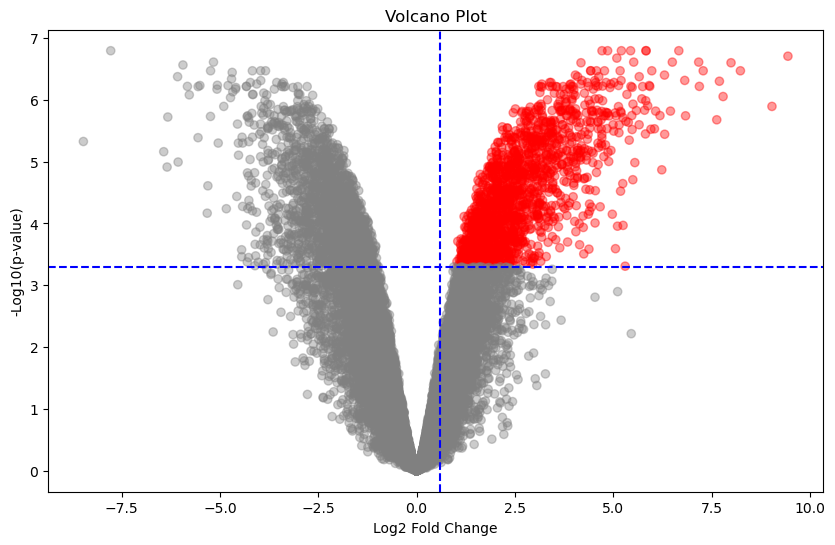

In [12]:
import matplotlib.pyplot as plt

# Define thresholds
fold_change_threshold = logFC  # Threshold for log2 fold change
pvalue_threshold = -np.log10(adj_P_Val)  # Threshold for p-value
b_value_threshold = B

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot: points with different colors for significance
# Color significant points differently
colors = np.where(
    (ttherm_df['logFC'] > fold_change_threshold)
    & 
    (ttherm_df['negLogPValue'] > pvalue_threshold)
    & 
    (ttherm_df['B'] > B), 
    'red', 
    'grey'
)

plt.scatter(
    ttherm_df['logFC'], 
    ttherm_df['negLogPValue'], 
    c=colors, 
    alpha=0.4,
)

# Add labels and title
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')

# Add horizontal and vertical threshold lines
plt.axhline(y=pvalue_threshold, color='blue', linestyle='--')
plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')

# # Annotate significant genes
# for i, row in ttherm_df.iterrows():
#     if (abs(row['log2FoldChange']) >= fold_change_threshold) and (row['pvalue'] <= pvalue_threshold):
#         plt.text(
#             row['log2FoldChange'], 
#             row['-log10(pvalue)'], 
#             row['Gene'], 
#             fontsize=8,
#             ha='right'
#         )

# Save the figure as an SVG file
plt.savefig('regranulation_volcano_plot.svg', format='svg')

# Show the plot
plt.show()

In [13]:
np.count_nonzero(colors == 'red')

1632

In [14]:
ttherm_df_filtered.to_csv(f'./de_regranulation_FC_{FC}_adj_P_Val_{adj_P_Val}_B_{B}.csv', index=False)

In [15]:
muco_exp_list = [
'TTHERM_00052190',
'TTHERM_00011710',
'TTHERM_00321680',
'TTHERM_00445920',
'TTHERM_00410180',
'TTHERM_00410210',
'TTHERM_00313130',
'TTHERM_00059370',
'TTHERM_00283800',
'TTHERM_00241790',
'TTHERM_00318900',
'TTHERM_00852790',
'TTHERM_00467390',
'TTHERM_01332070',
'TTHERM_00497590',
'TTHERM_00013410',
'TTHERM_00527180',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00378890',
'TTHERM_00522600',
'TTHERM_01055600',
'TTHERM_00558350',
'TTHERM_00221120',
'TTHERM_00572100',
'TTHERM_00420770',
'TTHERM_00566910',
'TTHERM_00658810',
'TTHERM_00047330',
'TTHERM_000193469',
'TTHERM_000486279',
'TTHERM_00141040',
'TTHERM_00227750',
'TTHERM_00317390',
'TTHERM_00670750',
'TTHERM_01122800',
'TTHERM_01213910',
'TTHERM_00886960',
'TTHERM_01287970',
'TTHERM_00498010',
]

In [16]:
len(muco_exp_list)

40

In [17]:
de_regranulation_df = pd.read_csv('./de_regranulation_FC_1.5_adj_P_Val_0.0005_B_1.csv')

In [18]:
de_muco = list(set(list(de_regranulation_df['Unnamed: 0'].values)).intersection(set(muco_exp_list)))
de = list(set(list(de_regranulation_df['Unnamed: 0'].values)) - set(muco_exp_list))
muco = list(set(muco_exp_list) - set(list(de_regranulation_df['Unnamed: 0'].values)))

In [19]:
de_regranulation_annot_df = pd.DataFrame({
    'TTHERM_ID': de_muco + de + muco,
    'mucocysts': ['DE,EV' for _ in range(len(de_muco))] + ['DE' for _ in range(len(de))] + ['EV' for _ in range(len(muco))],
    })

In [20]:
de_regranulation_annot_df

,TTHERM_ID,mucocysts
0,TTHERM_00227750,"DE,EV"
1,TTHERM_00670750,"DE,EV"
2,TTHERM_00498010,"DE,EV"
3,TTHERM_00410180,"DE,EV"
4,TTHERM_00059370,"DE,EV"
...,...,...
1638,TTHERM_00522600,EV
1639,TTHERM_00497590,EV
1640,TTHERM_00221120,EV
1641,TTHERM_000486279,EV


In [21]:
modified_annotation = pd.read_csv('../active_files/complete_annotation.csv')
modified_annotation_no_muco = modified_annotation.copy()

In [22]:
modified_annotation = modified_annotation.merge(de_regranulation_annot_df, on='TTHERM_ID', how='outer')
modified_annotation

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description,peptide,common_name,InterPro,InterPro_description,mucocysts
0,TTHERM_00840110,5911.EAS05042,0.0,1278.5,"2E5M0@1|root,2SCE9@2759|Eukaryota,3ZEBN@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,hypothetical protein,MISSNQTADQENKVENKVANAEHVNQQSYDSIPQSLSPAVIAQIMD...,Unnamed,-,-,NaN
1,TTHERM_01082930,31033.ENSTRUP00000031008,1.9999999999999997e-28,94.2,"COG5078@1|root,KOG0418@2759|Eukaryota,38KYZ@33...",33208|Metazoa,O,Belongs to the ubiquitin-conjugating enzyme fa...,UBE2K,"GO:0000209,GO:0003674,GO:0003824,GO:0004842,GO...",...,-,-,-,"UBA,UQ_con",ubiquitin-conjugating enzyme E2,MHKNILIILFQIFCCQIYTTIYTFYYFMANIVFIIHNVKLDLFSCF...,Unnamed,"IPR000608,IPR016135,IPR023313,IPR050113","Ubiquitin-conjugating enzyme E2,Ubiquitin-conj...",NaN
2,TTHERM_01081610,5911.EAR82090,0.0,2110.7,"2A5FX@1|root,2RY9I@2759|Eukaryota",2759|Eukaryota,-,-,-,-,...,-,-,-,PRESAN,transmembrane protein putative,MSSQSPAKLNNQNCAAANQYYNDLESCVQGYCIKQQSGSGARGCFP...,Unnamed,-,-,NaN
3,TTHERM_00059210,5911.EAR87408,3.2999999999999998e-298,983.9,"COG0575@1|root,KOG1440@2759|Eukaryota,3ZAR9@58...",5878|Ciliophora,I,Cytidylyltransferase family,-,-,...,-,-,-,CTP_transf_1,phosphatidate cytidylyltransferase,MSQVTNRSQKKSHQKRDEKSEEDSSDEKTDDFSEEELDKLQEAQKK...,Unnamed,"IPR000374,IPR016720","Phosphatidate cytidylyltransferase,Phosphatida...",NaN
4,TTHERM_00535200,5911.EAS03184,0.0,2448.3,"2E77S@1|root,2SDUU@2759|Eukaryota",5911.EAS03184|-,S,Src homology 3 domains,-,-,...,-,-,-,-,beta-Pak interactive eXchange factor Src-like ...,MFTKSNSRSALAGLNSIVNSQNDSLTSRAQHQNYAKKDLTISNSTS...,Unnamed,"IPR001452,IPR036028,IPR051569","SH3 domain,SH3-like domain superfamily,SH3 and...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,TTHERM_00058270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
26702,TTHERM_00554645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
26703,TTHERM_00519812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE
26704,TTHERM_000193469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EV


In [23]:
modified_annotation.isna().sum()

TTHERM_ID                   0
seed_ortholog              19
evalue                     19
score                      19
eggNOG_OGs                 19
max_annot_lvl              19
COG_category               19
Description                19
Preferred_name             19
GOs                        19
EC                         19
KEGG_ko                    19
KEGG_Pathway               19
KEGG_Module                19
KEGG_Reaction              19
KEGG_rclass                19
BRITE                      19
KEGG_TC                    19
CAZy                       19
BiGG_Reaction              19
PFAMs                      19
TGD2021_description        19
peptide                    19
common_name                19
InterPro                   19
InterPro_description       19
mucocysts               25063
dtype: int64

In [24]:
modified_annotation = modified_annotation.fillna('-')

In [25]:
modified_annotation.isna().sum()

TTHERM_ID               0
seed_ortholog           0
evalue                  0
score                   0
eggNOG_OGs              0
max_annot_lvl           0
COG_category            0
Description             0
Preferred_name          0
GOs                     0
EC                      0
KEGG_ko                 0
KEGG_Pathway            0
KEGG_Module             0
KEGG_Reaction           0
KEGG_rclass             0
BRITE                   0
KEGG_TC                 0
CAZy                    0
BiGG_Reaction           0
PFAMs                   0
TGD2021_description     0
peptide                 0
common_name             0
InterPro                0
InterPro_description    0
mucocysts               0
dtype: int64

In [26]:
modified_annotation.to_csv('../active_files/complete_annotation.csv', index=False)

In [27]:
# MIN-MAX
microarray = pd.read_csv('../TGNE/embedding/test_nn3_leiden_label_df_round_1.csv')
rna_seq = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

# Z-SCORE
# microarray = pd.read_csv('./testz_nn3_leiden_label_df_round_1.csv')
# rna_seq = pd.read_csv('./rnaz_seq_label_df_round_1.csv')

microarray_enrich = clustering_utils.compute_enrichment(microarray)

rna_seq_enrich = clustering_utils.compute_enrichment(rna_seq)

In [28]:
modified_annotation_no_muco.to_csv('../active_files/complete_annotation.csv', index=False)

In [29]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

rna_de = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])
microarray_de = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]['module'].values])

len(rna_ev), len(microarray_ev), len(rna_de), len(microarray_de)

(5, 7, 44, 54)

In [30]:
len(rna_ev.intersection(rna_de))

3

In [31]:
rna_ev

{40, 194, 199, 219, 294}

In [32]:
print(*['m'+str(m).zfill(3) for m in rna_ev], sep=', ')

m194, m294, m199, m040, m219


In [33]:
print(*['m'+str(m).zfill(3) for m in microarray_ev], sep=', ')

m001, m002, m003, m004, m005, m006, m378


In [34]:
(rna_ev.intersection(rna_de))

{194, 199, 294}

In [35]:
print(*['m'+str(m).zfill(3) for m in rna_de], sep=', ')

m131, m280, m412, m029, m543, m294, m168, m296, m553, m044, m432, m561, m178, m052, m564, m565, m568, m313, m570, m444, m445, m446, m575, m064, m193, m066, m067, m194, m577, m199, m072, m585, m586, m331, m594, m595, m090, m091, m096, m360, m488, m109, m110, m254


In [36]:
len(microarray_ev.intersection(microarray_de))

5

In [37]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE', 'EV'])].shape

((49, 7), (61, 7))

In [38]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])].shape, microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])].shape

((5, 7), (7, 7))

In [39]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,0.0,DE,differentially expressed in mucocyst regranula...,6.233894,4.698388e-09,16.0,42.0
0,1.0,DE,differentially expressed in mucocyst regranula...,13.476211,1.137824e-27,28.0,34.0
0,2.0,DE,differentially expressed in mucocyst regranula...,13.476211,1.137824e-27,28.0,34.0
0,3.0,DE,differentially expressed in mucocyst regranula...,14.671146,1.588503e-55,52.0,58.0
0,4.0,DE,differentially expressed in mucocyst regranula...,13.247024,4.090686e-33,34.0,42.0
0,8.0,DE,differentially expressed in mucocyst regranula...,3.095886,2.715380e-02,7.0,37.0
0,29.0,DE,differentially expressed in mucocyst regranula...,4.090993,6.989688e-03,6.0,24.0
0,30.0,DE,differentially expressed in mucocyst regranula...,3.487404,1.504886e-04,13.0,61.0
0,47.0,DE,differentially expressed in mucocyst regranula...,3.481696,1.047073e-03,10.0,47.0
0,48.0,DE,differentially expressed in mucocyst regranula...,4.405684,2.038261e-03,7.0,26.0


In [40]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'DE'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,29.0,DE,differentially expressed in mucocyst regranula...,2.805252,3.605692e-02,6.0,35.0
0,44.0,DE,differentially expressed in mucocyst regranula...,3.719084,2.270556e-02,5.0,22.0
0,52.0,DE,differentially expressed in mucocyst regranula...,3.409161,3.105499e-02,5.0,24.0
0,64.0,DE,differentially expressed in mucocyst regranula...,3.445046,4.107115e-03,8.0,38.0
0,66.0,DE,differentially expressed in mucocyst regranula...,2.937123,1.757040e-02,7.0,39.0
0,67.0,DE,differentially expressed in mucocyst regranula...,2.386412,4.545332e-02,7.0,48.0
0,72.0,DE,differentially expressed in mucocyst regranula...,2.727328,4.030479e-02,6.0,36.0
0,90.0,DE,differentially expressed in mucocyst regranula...,2.490169,3.774091e-02,7.0,46.0
0,91.0,DE,differentially expressed in mucocyst regranula...,2.727328,4.030479e-02,6.0,36.0
0,96.0,DE,differentially expressed in mucocyst regranula...,3.356712,4.800673e-03,8.0,39.0


In [41]:
microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
1,1.0,EV,experimentally validated mucocyst-associated gene,39.273529,4.947943e-02,2.0,34.0
1,2.0,EV,experimentally validated mucocyst-associated gene,58.910294,1.139528e-03,3.0,34.0
1,3.0,EV,experimentally validated mucocyst-associated gene,103.600862,1.895944e-14,9.0,58.0
1,4.0,EV,experimentally validated mucocyst-associated gene,158.964286,4.895547e-18,10.0,42.0
0,5.0,EV,experimentally validated mucocyst-associated gene,267.060000,2.999931e-03,2.0,5.0
0,6.0,EV,experimentally validated mucocyst-associated gene,556.375000,1.078811e-11,5.0,6.0
1,378.0,EV,experimentally validated mucocyst-associated gene,54.133784,1.357697e-03,3.0,37.0


In [42]:
print(','.join(['m'+str(int(m)).zfill(3) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m001,m002,m003,m004,m005,m006,m378


In [43]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,40.0,EV,experimentally validated mucocyst-associated gene,86.148387,1.241951e-05,4.0,31.0
1,194.0,EV,experimentally validated mucocyst-associated gene,159.655435,5.163440e-20,11.0,46.0
1,199.0,EV,experimentally validated mucocyst-associated gene,46.580233,1.850141e-03,3.0,43.0
0,219.0,EV,experimentally validated mucocyst-associated gene,49.455556,3.898948e-02,2.0,27.0
1,294.0,EV,experimentally validated mucocyst-associated gene,43.074194,4.498428e-02,2.0,31.0


In [44]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
13861,TTHERM_01297430,294
13862,TTHERM_01213910,294
13863,TTHERM_01142782,294
13864,TTHERM_01002740,294
13865,TTHERM_00833627,294
...,...,...
22002,TTHERM_00218460,40
22003,TTHERM_00101440,40
22004,TTHERM_00046372,40
22005,TTHERM_00041538,40


In [45]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
8281,TTHERM_01123950,378
8282,TTHERM_01044620,378
8283,TTHERM_00962070,378
8284,TTHERM_00962020,378
8285,TTHERM_00939090,378
...,...,...
20381,TTHERM_00138495,1
20382,TTHERM_00136330,1
20383,TTHERM_00129415,1
20384,TTHERM_00120780,1


In [46]:
print(','.join(['m'+str(int(m)).zfill(3) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]))

m040,m194,m199,m219,m294


In [47]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])]

,TTHERM_ID,label
13861,TTHERM_01297430,294
13862,TTHERM_01213910,294
13863,TTHERM_01142782,294
13864,TTHERM_01002740,294
13865,TTHERM_00833627,294
...,...,...
22002,TTHERM_00218460,40
22003,TTHERM_00101440,40
22004,TTHERM_00046372,40
22005,TTHERM_00041538,40


In [48]:
rna_seq.loc[rna_seq['label'].isin([int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./rna_seq_ev_enriched_module_genes.csv', index=False)

In [49]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values

array([ 40., 194., 199., 219., 294.])

In [50]:
rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]

,module,term,info,fold_change,bonferroni,term_count,module_size
0,40.0,EV,experimentally validated mucocyst-associated gene,86.148387,1.241951e-05,4.0,31.0
1,194.0,EV,experimentally validated mucocyst-associated gene,159.655435,5.163440e-20,11.0,46.0
1,199.0,EV,experimentally validated mucocyst-associated gene,46.580233,1.850141e-03,3.0,43.0
0,219.0,EV,experimentally validated mucocyst-associated gene,49.455556,3.898948e-02,2.0,27.0
1,294.0,EV,experimentally validated mucocyst-associated gene,43.074194,4.498428e-02,2.0,31.0


In [51]:
[int(m) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values]

[40, 194, 199, 219, 294]

In [52]:
microarray.loc[microarray['label'].isin([int(m) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])].to_csv('./microarray_ev_enriched_module_genes.csv', index=False)

In [53]:
rna_ev = set([(int(m)) for m in rna_seq_enrich.loc[rna_seq_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])
microarray_ev = set([(int(m)) for m in microarray_enrich.loc[microarray_enrich['term'].isin(['DE,EV', 'EV'])]['module'].values])

In [54]:
'select * from rna_seq_enrich where info LIKE "%ribo%"'

'select * from rna_seq_enrich where info LIKE "%ribo%"'

In [55]:
dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select * from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)

,module,term,info,fold_change,bonferroni,term_count,module_size
53,725.0,J,"Translation, ribosomal structure and biogenesis",13.031555,3.466374e-04,6.0,29.0
52,724.0,GO:0016071,Mrna metabolic process: The chemical reactions...,87.848684,1.577549e-03,4.0,19.0
51,721.0,GO:0043232,Intracellular non-membrane-bounded organelle: ...,25.382485,6.548972e-06,7.0,15.0
50,721.0,GO:0043229,Intracellular organelle: Organized structure o...,9.491851,2.089845e-03,7.0,15.0
49,721.0,GO:0043228,Non-membrane-bounded organelle: Organized stru...,25.228340,6.790286e-06,7.0,15.0
48,721.0,GO:0043226,Organelle: Organized structure of distinctive ...,9.293661,2.359568e-03,7.0,15.0
47,721.0,GO:0006996,Organelle organization: A process that is carr...,22.909559,1.203230e-05,7.0,15.0
46,692.0,GO:0043232,Intracellular non-membrane-bounded organelle: ...,10.119263,4.884781e-03,8.0,43.0
45,692.0,GO:0043228,Non-membrane-bounded organelle: Organized stru...,10.057810,5.084010e-03,8.0,43.0
44,462.0,J,"Translation, ribosomal structure and biogenesis",13.996855,1.365697e-07,10.0,45.0


In [56]:
print(', '.join([f'm{str(int(mod)).zfill(3)}' for mod in (dataframe_utils.sql_query_df({'rna_seq_enrich': rna_seq_enrich}, 'select distinct(module) from rna_seq_enrich where info LIKE "%ribosom%"').sort_values(by='module', ascending=False)['module'].values)]))

m725, m724, m721, m692, m462, m461, m460, m458, m454, m452, m413, m394, m393, m392, m389, m359, m250, m237, m234, m199


In [57]:
rna_ev

{40, 194, 199, 219, 294}

In [58]:
muco_exp = set(muco_exp_list)

In [59]:
# ttherm_df_filtered = ttherm_df_filtered.loc[
#     (ttherm_df_filtered['diff_exp_prob'] > 0.9)
# ]
# ttherm_df_filtered

In [60]:
print(','.join(list(ttherm_df_filtered['Unnamed: 0'].values)))

TTHERM_00056190,TTHERM_01127520,TTHERM_00261850,TTHERM_00558440,TTHERM_00196410,TTHERM_01338520,TTHERM_00188500,TTHERM_00516395,TTHERM_00481170,TTHERM_00822150,TTHERM_01014580,TTHERM_00239350,TTHERM_01002630,TTHERM_00285550,TTHERM_01043140,TTHERM_00227130,TTHERM_00480150,TTHERM_00666210,TTHERM_00845880,TTHERM_00516330,TTHERM_00011660,TTHERM_01161080,TTHERM_01084400,TTHERM_00989430,TTHERM_00730330,TTHERM_00532720,TTHERM_00402020,TTHERM_00137740,TTHERM_00600240,TTHERM_00999152,TTHERM_01143870,TTHERM_01080440,TTHERM_00290740,TTHERM_00299979,TTHERM_00193820,TTHERM_00842410,TTHERM_00194210,TTHERM_00047020,TTHERM_00437690,TTHERM_00462890,TTHERM_00339900,TTHERM_00133760,TTHERM_00348960,TTHERM_00713420,TTHERM_00256990,TTHERM_00301830,TTHERM_01043130,TTHERM_00624120,TTHERM_00040350,TTHERM_00338350,TTHERM_01495770,TTHERM_01349994,TTHERM_00320460,TTHERM_00361750,TTHERM_00545770,TTHERM_01312368,TTHERM_00522740,TTHERM_00467430,TTHERM_00344200,TTHERM_00338490,TTHERM_01085670,TTHERM_00640030,TTHERM_0

In [61]:
# len(inter)

In [62]:
# print(','.join(inter))

In [63]:
# import requests
# from bs4 import BeautifulSoup

# def extract_descriptions_from_html(url):
#     try:
#         # Get the HTML content of the web page
#         response = requests.get(url)
#         response.raise_for_status()  # Check if the request was successful
#         html_content = response.content

#         # Parse the HTML content using BeautifulSoup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find the specific table with class 'main'
#         table = soup.find('table', class_='main')
#         if table:
#             # Find all rows in the table, skipping the header row
#             rows = table.find_all('tr')[1:]  # Skip the header row
#             descriptions = []

#             for row in rows:
#                 # Find all cells in the row
#                 cells = row.find_all('td')
#                 if len(cells) >= 4:
#                     description_text = cells[3].get_text(strip=True)
#                     descriptions.append(description_text)
            
#             if descriptions:
#                 for idx, description in enumerate(descriptions, 1):
#                     print(f"Description {idx}: {description}")
#             else:
#                 print("No descriptions found.")
#         else:
#             print("Table not found in the HTML.")

#     except requests.exceptions.RequestException as e:
#         print(f"An error occurred while fetching the HTML content: {e}")

# for gene in inter:
#     url = f"https://tet.ciliate.org/search.php?gene_name={gene}"  # Replace with the actual URL
#     extract_descriptions_from_html(url)

In [64]:
import scipy.stats as stats

# Total number of genes in the entire dataset
N = 20000

# Total number of specific genes you are interested in
K = 50

# Number of genes randomly selected
n = 5000

# Number of specific genes found in the selected set
k = 50

# Hypergeometric test
p_value = stats.hypergeom.sf(k-1, N, K, n)

print(f"The p-value is: {p_value}")

The p-value is: 6.559457458892222e-31


In [65]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 78
b = 1300
c = 16000
d = 16000

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

# One-tailed test (greater)
oddsratio, p_value_greater = stats.fisher_exact(table, alternative='greater')
print(f"One-tailed p-value (greater): {p_value_greater}")

# One-tailed test (less)
oddsratio, p_value_less = stats.fisher_exact(table, alternative='less')
print(f"One-tailed p-value (less): {p_value_less}")

Two-tailed p-value: 6.555352598579253e-277
One-tailed p-value (greater): 1.0
One-tailed p-value (less): 5.971977437724528e-277


In [66]:
from scipy.stats import chi2_contingency

# Create a 2x2 contingency table (example data)
# Replace with your actual observed counts
a = 78
b = 1300
c = 20000
d = 20000

observed = [[a, b], [c, d]]

# Perform Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 1046.7116189215628
P-value: 1.2620381730596847e-229
Degrees of Freedom: 1
Expected Frequencies:
[[  668.65203731   709.34796269]
 [19409.34796269 20590.65203731]]


In [67]:
all_ttherm_df = pd.read_csv('../TGNE/embedding/rna_seq_label_df_round_1.csv')

In [68]:
# counts = []

# for i in range(10000):
#     counts.append(len(set(all_ttherm_df.sample(4000)['TTHERM_ID'].values).intersection(set(inter))))

In [69]:
# import matplotlib.pyplot as plt

# plt.hist(counts, 10)
# plt.show()

In [70]:
import scipy.stats as stats

# Example 2x2 contingency table
#           | Present | Absent |
# Condition |    a    |    b   |
# Control   |    c    |    d   |
a = 26
b = 1934
c = 13
d = 17027

table = [[a, b], [c, d]]

# Two-tailed test (default)
oddsratio, p_value_two_tailed = stats.fisher_exact(table, alternative='two-sided')
print(f"Two-tailed p-value: {p_value_two_tailed}")

Two-tailed p-value: 4.1016327983861445e-17


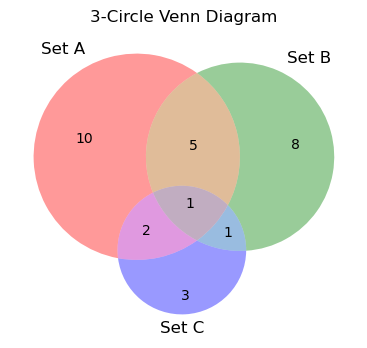

In [71]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.figure(figsize=(8, 4))
venn3(subsets=(10, 8, 5, 3, 2, 1, 1), set_labels=('Set A', 'Set B', 'Set C'))
plt.title("3-Circle Venn Diagram")
plt.show()

In [72]:
rna_seq_ev_enriched_df = pd.read_csv('../TGNE/embedding/rna_seq_ev_enriched_module_genes.csv')

In [73]:
microarray_ev_enriched_df = pd.read_csv('../TGNE/embedding/microarray_ev_enriched_module_genes.csv')

In [74]:
# import matplotlib.pyplot as plt
# from venn import venn

# # Define the sets
# sets = {
#     'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
#     'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
#     'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
# }

# # Create the Venn diagram
# v = venn(sets, legend_loc='upper center', ax=None, figsize=(10, 50))

# plt.savefig('muco_venn.svg', format='svg')

# plt.show()

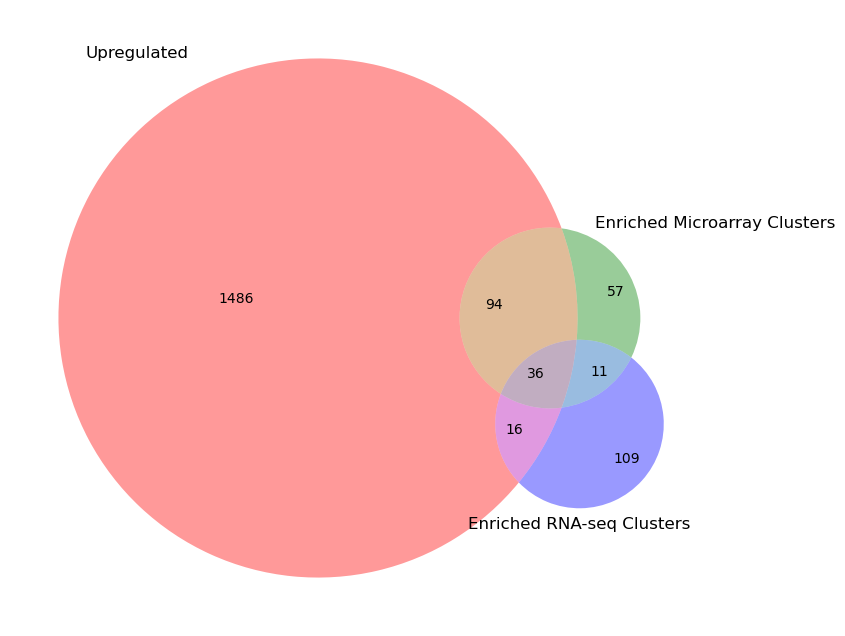

In [75]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sets
sets = {
    'Upregulated': set(ttherm_df_filtered['Unnamed: 0'].values),
    'Enriched Microarray Clusters': set(microarray_ev_enriched_df['TTHERM_ID'].values),
    'Enriched RNA-seq Clusters': set(rna_seq_ev_enriched_df['TTHERM_ID'].values),
}

# Create the Venn diagram with specified figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize here as needed

# Create a 3-set Venn diagram
v = venn3([sets['Upregulated'], sets['Enriched Microarray Clusters'], sets['Enriched RNA-seq Clusters']],
          ('Upregulated', 'Enriched Microarray Clusters', 'Enriched RNA-seq Clusters'),
          ax=ax)

# Save the plot in SVG format
plt.savefig('muco_venn.svg', format='svg')

# Display the plot
plt.show()

In [76]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))

In [77]:
intersection_all = (set(ttherm_df_filtered['Unnamed: 0'].values).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)))
intersection_enriched = (set(microarray_ev_enriched_df['TTHERM_ID'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_dem = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(microarray_ev_enriched_df['TTHERM_ID'].values)) - intersection_all
intersection_der = (set(ttherm_df_filtered['Unnamed: 0'].values)).intersection(set(rna_seq_ev_enriched_df['TTHERM_ID'].values)) - intersection_all

In [78]:
len(intersection_all), len(intersection_enriched), len(intersection_dem), len(intersection_der)

(36, 11, 94, 16)

In [79]:
print(f'{len(intersection_all)} gene intersection between all gene groups:')
print(*intersection_all, sep=', ')

print(f'{len(intersection_enriched)} gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:')
print(*intersection_enriched, sep=', ')

print(f'{len(intersection_dem)} gene intersection between the differentially expressed genes and the genes in the microarray enriched clusters:')
print(*intersection_dem, sep=', ')

print(f'{len(intersection_der)} gene intersection between the differentially expressed genes and the genes in the RNA-seq enriched clusters:')
print(*intersection_der, sep=', ')

36 gene intersection between all gene groups:
TTHERM_00713420, TTHERM_00193465, TTHERM_01321550, TTHERM_00312200, TTHERM_00227750, TTHERM_00670750, TTHERM_01106040, TTHERM_00445920, TTHERM_00059370, TTHERM_01049340, TTHERM_00321680, TTHERM_00938950, TTHERM_00317390, TTHERM_00787390, TTHERM_00321720, TTHERM_00592740, TTHERM_00218690, TTHERM_00522740, TTHERM_01213910, TTHERM_00773710, TTHERM_00420770, TTHERM_00649180, TTHERM_00052190, TTHERM_00011710, TTHERM_00313130, TTHERM_00685980, TTHERM_00145480, TTHERM_00630030, TTHERM_00241790, TTHERM_00390080, TTHERM_00585170, TTHERM_00187110, TTHERM_00283760, TTHERM_00047330, TTHERM_00314860, TTHERM_00486275
11 gene intersection between the genes in the microarray enriched clusters and the RNA-seq enriched clusters:
TTHERM_00624730, TTHERM_00378890, TTHERM_00537380, TTHERM_00624720, TTHERM_00527180, TTHERM_01002870, TTHERM_00038880, TTHERM_00221120, TTHERM_00522600, TTHERM_01055600, TTHERM_01002860
94 gene intersection between the differentially

In [80]:
print(*intersection_enriched.intersection(set([
'TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',
])), sep=', ')

TTHERM_00624730, TTHERM_00378890, TTHERM_00624720, TTHERM_00527180, TTHERM_00522600, TTHERM_01055600


In [81]:
len(intersection_enriched.intersection(set(['TTHERM_01018540',
'TTHERM_00473020',
'TTHERM_01055600',
'TTHERM_00624730',
'TTHERM_00624720',
'TTHERM_00527180',
'TTHERM_00522600',
'TTHERM_00378890',
'TTHERM_00321730',])))

6

In [82]:
lx = 17.980
ly = 22.034

In [83]:
fx = 12.709
fy = 21.085

In [84]:
fx - lx 

-5.271000000000001

In [85]:
fy - ly 

-0.9489999999999981

In [86]:
108.552 - (-5.271) # x

113.82300000000001

In [87]:
113.166 - (-0.949) # y

114.115

In [88]:
len(intersection_all), len(muco_exp)

(36, 40)

In [89]:
len(intersection_all.intersection(muco_exp))

13

In [90]:
print(*intersection_all.intersection(muco_exp), sep=', ')

TTHERM_00052190, TTHERM_00059370, TTHERM_00445920, TTHERM_00011710, TTHERM_00313130, TTHERM_00321680, TTHERM_00241790, TTHERM_01213910, TTHERM_00227750, TTHERM_00047330, TTHERM_00317390, TTHERM_00420770, TTHERM_00670750


In [91]:
z = ['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370']

In [92]:
len(intersection_all.intersection(muco_exp).intersection(z))

12

In [93]:
print(*intersection_all.intersection(muco_exp).intersection(z), sep=', ')

TTHERM_00052190, TTHERM_00011710, TTHERM_00445920, TTHERM_00059370, TTHERM_00321680, TTHERM_00241790, TTHERM_01213910, TTHERM_00227750, TTHERM_00317390, TTHERM_00047330, TTHERM_00670750, TTHERM_00420770


In [94]:
len(set(['TTHERM_00047330', 'TTHERM_00420770', 'TTHERM_00052190', 'TTHERM_00445920', 'TTHERM_00317390', 'TTHERM_00227750', 'TTHERM_00670750', 'TTHERM_00321680', 'TTHERM_01213910', 'TTHERM_00241790', 'TTHERM_00011710', 'TTHERM_00059370'
]).intersection(set(['TTHERM_00420770', 'TTHERM_00227750', 'TTHERM_00317390', 'TTHERM_01213910', 'TTHERM_00011710', 'TTHERM_00321680', 'TTHERM_00241790', 'TTHERM_00670750', 'TTHERM_00052190', 'TTHERM_00047330', 'TTHERM_00059370', 'TTHERM_00445920'
])))

12